#### ACCQ203
# TP 8 - Primalité

## Exo 114

**1.**

In [107]:
def testRM(n,a=-1):
    
    if a == -1:
        a = randint(2,n-1)

    v = valuation(n-1,2)
    m = (n-1)/(2^v)

    if gcd(a,n) > 1 :
        return False

    b = mod(a^m,n)
    if b == 1 :
        return True

    for i in range(1,v+1) :
        if mod(b^2,n) == 1 :
            g = gcd(b+1,n)
            if g == 1 or g == n :
                return True
            else :
                return False
        b = mod(b^2,n)

    return False

In [56]:
testRM(23), testRM(47), testRM(45), testRM(561)

(True, True, False, False)

**2.**

In [53]:
def isTemoinRM(n,a):

    v = valuation(n-1,2)
    m = (n-1)/(2^v)

    b = mod(a^m,n)
    if b == 1 :
        return False
    for i in range(v-1) :
        b = mod(b^2,n)
        if b==-1:
            return False

    return True

In [57]:
isTemoinRM(561, 2)

True

2 est témoin de Rabin-Miller de 561.

## Exo 115

**1.**

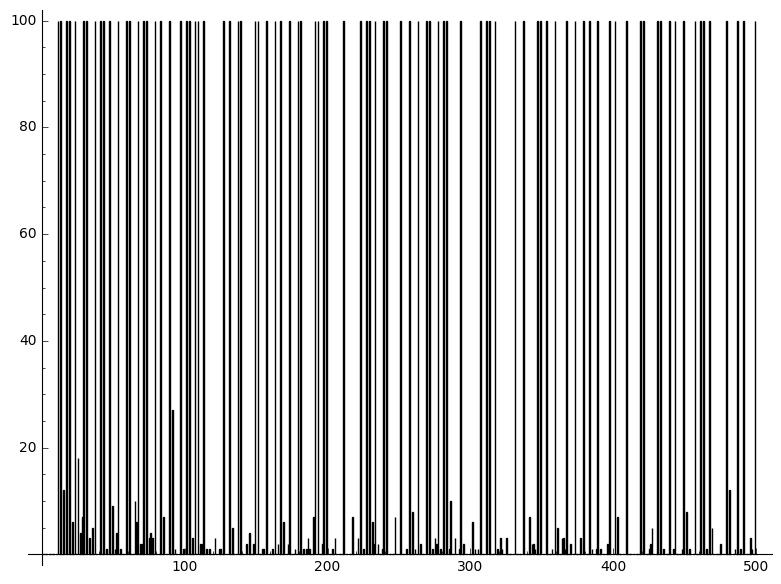

In [58]:
test = [sum(testRM(n) for i in range(100)) for n in range(10,501)]
bar_chart([0 for i in range(10)]+test)

On représente le même diagramme, mais seulement pour les nombres composés :

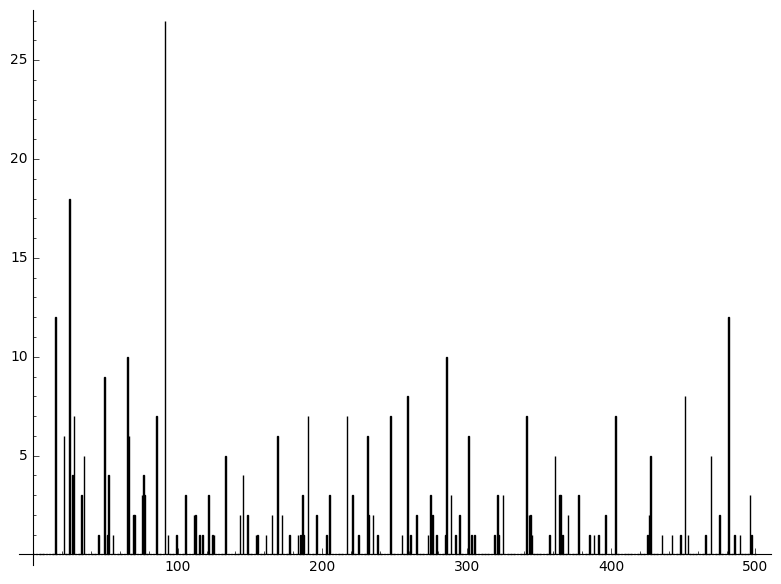

In [59]:
for i in range(len(test)):
    if is_prime(10+i):
        test[i] = 0

bar_chart([0 for i in range(10)]+test)

**2.**

In [68]:
erreurs = [10+i for i in range(len(test)) if test[i]>8]
erreurs

[15, 25, 49, 65, 91, 286, 481]

In [69]:
map(factor,erreurs)

[3 * 5, 5^2, 7^2, 5 * 13, 7 * 13, 2 * 11 * 13, 13 * 37]

On remarque que les nombres composés déclarés le plus fréquemment premiers sont facteurs de deux nombres premiers.

**3.** On sait qu'un nombre composé $n$ possède au moins $\frac{3}{4} \phi(n)$ témoins de Rabin-Miller. Donc la probabilité de diagnostiquer premier un nombre composé est inférieure à $2^{-2}$. Pour réduire cette probabilité à $2^{-50}$, il faut donc répéter le test 25 fois.

In [70]:
def testRM2(n):
    for i in range(25):
        if not(testRM(n)) :
            return False
    return True

In [73]:
test = [sum(testRM2(n) for i in range(100)) for n in range(10,501)]
for i in range(len(test)):
    if is_prime(10+i):
        test[i] = 0
test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


**4.**

In [83]:
times = [timeit('testRM(n)', number = 20, repeat = 3, seconds = true) for n in range(1001, 1001+100000, 100)]
x_coord = range(1001, 1001+100000, 100)

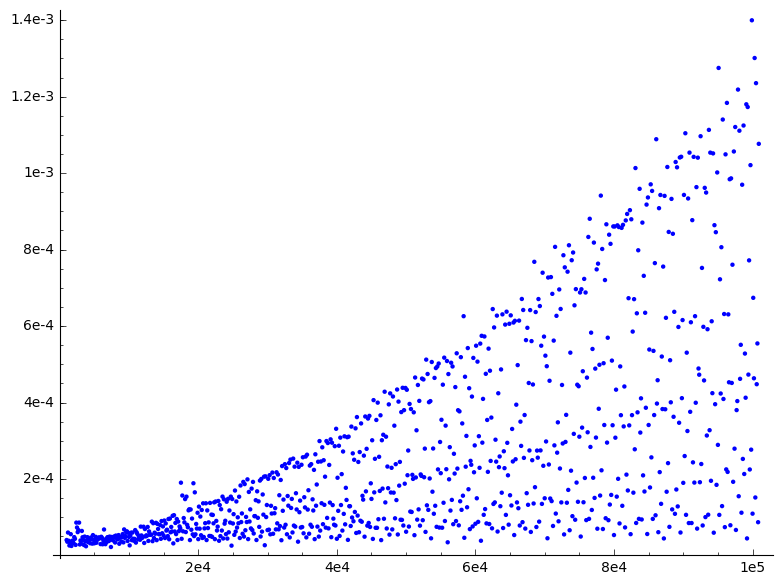

In [84]:
list_plot(zip(x_coord, times))

## Exo 118

**1.**

In [85]:
def testSS(n):
    if is_even(n) :
        return False

    a = randint(2,n-1)

    if gcd(a,n) != 1 :
        return False

    if jacobi_symbol(a,n) == mod(a^((n-1)/2),n) :
        return True
    else :
        return False

**2.**

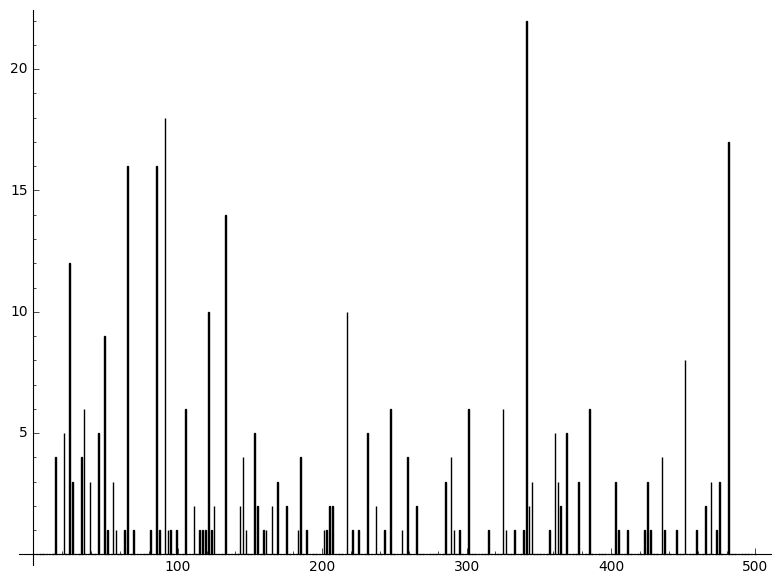

In [86]:
test = [sum(testSS(n) for i in range(100)) for n in range(10,501)]
for i in range(len(test)):
    if is_prime(10+i) :
        test[i] = 0
bar_chart([0 for i in range(10)]+test)

**3.**

In [87]:
erreurs = [10+i for i in range(len(test)) if test[i]>=8]
erreurs

[25, 49, 65, 85, 91, 121, 133, 217, 341, 451, 481]

In [88]:
map(factor, erreurs)

[5^2,
 7^2,
 5 * 13,
 5 * 17,
 7 * 13,
 11^2,
 7 * 19,
 7 * 31,
 11 * 31,
 11 * 41,
 13 * 37]

Les nombres composés les plus fréquemments déclarés premiers sont facteurs de deux nombres premiers.

**4.** On sait qu'un nombre composé $n$ possède au moins $\frac{1}{2} \phi(n)$ témoins de Rabin-Miller. Donc la probabilité de diagnostiquer premier un nombre composé est inférieure à $2^{-1}$. Pour réduire cette probabilité à $2^{-50}$, il faut donc répéter le test 50 fois.

In [89]:
def testSS2(n) :
    for i in range(50):
        if not(testSS(n)) :
            return False
    return True

In [91]:
test = [sum(testSS2(n) for i in range(100)) for n in range(10,501)]
for i in range(len(test)):
    if is_prime(10+i) :
        test[i] = 0
test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## Exo 119

In [92]:
def isTemoinRM(n,a):

    v = valuation(n-1,2)
    m = (n-1)/(2^v)

    b = mod(a^m,n)
    if b == 1 :
        return False
    for i in range(v-1) :
        b = mod(b^2,n)
        if b==-1:
            return False

    return True

In [94]:
def isTemoinSS(n,a):
    if mod(jacobi_symbol(a,n)-a^((n-1)/2),n) == 0 :
        return False
    else :
        return True

In [95]:
listeRMvsSS = []
for n in range(10,151):
    if is_odd(n):
        for a in range(n):
            if gcd(a,n)==1 and isTemoinRM(n,a) and not(isTemoinSS(n,a)):
                listeRMvsSS += [(n,a)]
                break
listeRMvsSS

[(11, 2),
 (13, 4),
 (15, 14),
 (17, 16),
 (19, 2),
 (21, 20),
 (23, 5),
 (25, 24),
 (27, 26),
 (29, 4),
 (31, 3),
 (33, 32),
 (35, 34),
 (37, 3),
 (39, 38),
 (41, 4),
 (43, 2),
 (45, 19),
 (47, 5),
 (49, 19),
 (51, 50),
 (53, 4),
 (55, 54),
 (57, 56),
 (59, 2),
 (61, 3),
 (63, 62),
 (65, 14),
 (67, 2),
 (69, 68),
 (71, 7),
 (73, 9),
 (75, 74),
 (77, 76),
 (79, 3),
 (81, 80),
 (83, 2),
 (85, 16),
 (87, 86),
 (89, 11),
 (91, 10),
 (93, 92),
 (95, 94),
 (97, 36),
 (99, 98),
 (101, 4),
 (103, 3),
 (105, 8),
 (107, 2),
 (109, 4),
 (111, 110),
 (113, 4),
 (115, 114),
 (117, 53),
 (119, 118),
 (121, 40),
 (123, 122),
 (125, 124),
 (127, 3),
 (129, 128),
 (131, 2),
 (133, 12),
 (135, 134),
 (137, 4),
 (139, 2),
 (141, 140),
 (143, 142),
 (145, 59),
 (147, 146),
 (149, 4)]

## Exo 121

In [101]:
def testL(n,p,q):

    delta = p^2-4*q
    g = gcd(n,2*q*delta)
    if (1<g and g<n) :
        return False
    elif (g==n) :
        print("Mauvais choix de (p,q)")
        return

    m = n - jacobi_symbol(delta,n)
    t = 0
    while (is_even(m)):
        m = m/2
        t+=1

    u = [0,1]
    for k in range(m-1):
        u += [p*u[k+1]-q*u[k]]
    g = gcd(n,u[m])
    if (1<g and g<n) :
        return False
    elif (g==n) :
        return True

    v = [2,p]
    for k in range(m-1):
        v += [p*v[k+1]-q*v[k]]
    g = gcd(n,v[m])
    if (1<g and g<n) :
        return False
    elif (g==n) :
        return True
    for s in range(1,t):
        for k in range(2^(s-1)*m-1,2^s*m-1):
            v += [p*v[k+1]-q*v[k]]
        g = gcd(n,v[2^s*m])
        if (1<g and g<n) :
            return False
        elif (g==n) :
            return True

    return False

In [102]:
testL(3,2,2)

True

In [25]:
testL(79,2,3)

True

In [26]:
testL(20,2,3)

False

In [27]:
testL(561,2,6)

False

## Exo 122

In [108]:
def testBPSW(n):

    if not(testRM(n,a=2)):
        return False
    delta = 5
    k = 0
    while(jacobi_symbol(delta,n)!=-1):
        k+=1
        delta = (-1)^k*(2*k+5)
    p = 1
    q = (1-delta)/4
    return testL(n,p,q)

In [109]:
test = False
for n in range(3,1000) :
    if testBPSW(n) != is_prime(n):
        test = True
test

False